## Assignment 3
### Problem 1.1

In [28]:
#tflecture1_1.py

# from '09_up_and_running_with_tensorflow.jpynb'

import tensorflow as tf

x = tf.Variable(3, name='X')   # create a variable, set its value to 3
y = tf.Variable(4, name='Y')

f = x*x*y + y + 2              # f is also a TF variable (overloaded operators)

# variables are not initialized yet

# a better way (which makes sure session is closed when done)

with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

print(result)       # Python v. 3.x print statement

42


In [29]:
#tflecture1_2.py
# from '09_up_and_running_with_tensorflow.jpynb'
# Demonstrate global_variables_initalizer

import tensorflow as tf

tf.reset_default_graph()       # always a good idea

x = tf.Variable(3, name='X')   # create a variable, set its value to 3
y = tf.Variable(4, name='Y')

f = x*x*y + y + 2              # f is also a TF variable (overloaded operators)

init = tf.global_variables_initializer()  # this creates a special node to initiliaze stuff

with tf.Session() as sess:
    init.run()        # initially all the variables in the node
    result = f.eval()

print(result)       # Python v. 3.x print statement

42


The ```init = tf.global variables initializer()``` will initialize all trainable variables before training. The return of this function is a single operation. and the ```init.run()``` will execute the previously defined operation.  

The difference between **tflecture1 1.py** and **tflecture1 2.py** is that **tflecture1 1.py** the variables initialized separately during the tf session while the **tflecture1 2.py** uses the ```init = tf.global variables initializer()``` which will initialize all variables in one operation. 

### Problem 1.2

In [30]:
# tflecture1_3.py Linear regression with TF
# from '09_up_and_running_with_tensorflow.jpynb'


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

# Solve X theta = y
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)

with tf.Session() as sess:
    theta_value = theta.eval()

# to print the estimated value:
print('thetavalue\n',theta_value)

#%%

# Compare with pure NumPy:
X = housing_data_plus_bias
y = housing.target.reshape(-1, 1)
theta_numpy = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print('theta_numpy\n',theta_numpy)

#%%

# Compare with scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing.data, housing.target.reshape(-1, 1))

print('theta scikit\n',np.r_[lin_reg.intercept_.reshape(-1, 1), lin_reg.coef_.T])

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm
learning_rate = 0.01        # gradient descent step size

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")

# Compute the gradient (2/M)*X'X
gradients = 2/m * tf.matmul(tf.transpose(X), error)

# create a node that assigns a new value to a variable
# (This implements the gradient descent algorithm
training_op = tf.assign(theta, theta - learning_rate * gradients)
#  This is equivalent to writing
#  theta <-- theta - learning_rate * gradients


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

thetavalue
 [[-3.7465141e+01]
 [ 4.3573415e-01]
 [ 9.3382923e-03]
 [-1.0662201e-01]
 [ 6.4410698e-01]
 [-4.2513184e-06]
 [-3.7732250e-03]
 [-4.2664889e-01]
 [-4.4051403e-01]]
theta_numpy
 [[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]
theta scikit
 [[-3.69419202e+01]
 [ 4.36693293e-01]
 [ 9.43577803e-03]
 [-1.07322041e-01]
 [ 6.45065694e-01]
 [-3.97638942e-06]
 [-3.78654265e-03]
 [-4.21314378e-01]
 [-4.34513755e-01]]
Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145007
Epoch 200 MSE = 0.5667047
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488116
Epoch 500 MSE = 0.54363626
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214705


In [31]:
#

# tflecture1 4.py Linear regression with TF
# from '09_up_and_running_with_tensorflow.jpynb'
# 

# This is the same as the last (gradient descent), except
# that it uses TF's ability to compute gradients

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm
learning_rate = 0.01        # gradient descent step size

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")

gradients = tf.gradients(mse, [theta])[0]
#  compute the gradient of the mse with respect to theta
#  The tf.gradients() function actually returns a list, so the [0] "unbrackets"
#      the list to just return the element of the list

# create a node that assigns a new value to a variable
# (This implements the gradient descent algorithm
training_op = tf.assign(theta, theta - learning_rate * gradients)
#  This is equivalent to writing
#  theta <-- theta - learning_rate * gradients


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717


For  **tflecture1_3.py** <br>
- Line 32: ```theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)```<br>
This is for calculating theta using the matrix form, which is
$$
\theta = (X^TX)^{-1}X^Ty
$$
- Line 78~87: This part of code is for defining a loss function(Mean Square Error) and computing the gradients of x's. The training_op will assign a new value to theta according to gradient descent and learning rate. 

- Line 94~102: This will start a new Tensorflow Session and execute the training operation. For every 100th epoch, print out the mse. <br>

For  **tflecture1_4.py** <br>
- Line 57 : ```gradients = tf.gradients(mse,[theta])[0]``` <br> 
    This is for calculating the gradients of the Mean square error. In this case, it's calculating the partial derivatives of the Mean square error with respect to theta.  

### Problem 1.3

In [32]:
#Implement TensorFlow optimizer

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm


X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")

### TO DO ###
# Using TF's optimizer (here a gradient descent optimizer)
learning_rate = 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse, global_step=tf.train.get_global_step())


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()


Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.7145006
Epoch 200 MSE = 0.56670463
Epoch 300 MSE = 0.5555716
Epoch 400 MSE = 0.5488117
Epoch 500 MSE = 0.5436362
Epoch 600 MSE = 0.53962916
Epoch 700 MSE = 0.53650916
Epoch 800 MSE = 0.5340678
Epoch 900 MSE = 0.53214717


For **tflecture1_4.py** the last MSE reported is 0.53214717 and the **prob1.py** returns 0.53214717 as the last MSE. We can see that using the TF's optimizer or computing the gradients manually will give the same results. However, we should stick to the tensorflow built in functions since it's optimized for calculating gradients and should have a shorter run time than it's counterparts.  

### Problem 2.1
Writing the loss as a function of regularization parameter $\lambda$ we have:
$$
C = C_0 + \frac{\lambda}{2n}\sum w^2
$$
Where the weights are updated by:
$$
w \leftarrow (1 - \frac{\eta \lambda}{n})w - \eta\frac{\partial C_0}{\partial w}
$$
So to use gradient descent to find the optimal $\eta$ and $\lambda$, we need to minimize $C(\lambda, \eta)$.
$$
{\partial \over \partial \lambda} C(\lambda,\eta) = {\partial \over \partial \lambda} C_0(\lambda,\eta) + {\lambda \over 2n} \sum_i 2 w_i {\partial w_i \over \partial \lambda} + {1 \over 2n} \sum_i w_i^2
$$
However, there is no analytical ways to express the gradient of the weights with respect to $\lambda$ and $\eta$. Also, the loss is not a function of $\eta$. If we try to compute the gradients of $\lambda$, we will find that the optimal value of $\lambda$ that minimizes the cost is $-\infty$. 

### Problem 2.2
**(a)** The formula for updating the weights can be written as:
$$
w \leftarrow (1 - \frac{\eta \lambda}{n})w - \frac{\eta}{m}(\sum \eta\frac{\partial C_0}{\partial w})
$$
This equation is composed of two terms: the weight decay (first term) and the gradient (second term). Since the weights for the first epoch are from random initialization, the sigmoid output is likely to be at 0 or 1, which it is likely that the derivatives will be zero.  

**(b)**
The term $(1 - \frac{\eta \lambda}{n})$ will be multiplied $ \frac{n}{m}$. N is the number of observations and m is the minibatch size. The weights will be updated by a factor of: 
$$
(1 - \frac{\eta \lambda}{n})^{\frac{n}{m}}
$$
Rewriting the equation, we have:
$$
((1 - \frac{\eta \lambda}{n})^{\frac{-n}{\eta \lambda}})^{\frac{\eta \lambda}{m}}
$$
When $ n >> \eta \lambda $, the term $(1 - \frac{\eta \lambda}{n})^{\frac{-n}{\eta \lambda}}$ is approximated to $exp$. The weight update in each term is then:
$$
e^{\frac{-\eta \lambda}{m}}
$$

**(c)**
If we are using cross entropy as the cost function, then the regularized cross entropy can be written as:
$$
C = -\frac{1}{n}\sum_{xj}(y_i ln a ^L_j + (1-y_i)ln(1-a^L_j)) + \frac{\lambda}{2n} \sum_w w^2
$$

Then, we set the weights as $\frac{1}{\sqrt n}$, the weight decay term of the regularized cross entropy becomes:
$$
\frac{\lambda}{2n}\times \frac{1}{(\sqrt n)^2} \times n = \frac{\lambda}{2n}
$$
If we take the partial derivative with respect to the weights, $\frac{\partial C}{\partial w}$, the weight decay term would reduce to 0 (tail off, as mentioned in the problem) because the weights,$w$, has been eliminated.


### Problem 2.3

In [33]:
# Linear regression with TF
# from '09_up_and_running_with_tensorflow.jpynb'
# 

# Use TF optimizer
# 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm
learning_rate = 0.01        # gradient descent step size

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")

### TO DO ###
# Using TF's optimizer (here a gradient descent optimizer)
learning_rate = 0.01
optimizer = tf.train.AdagradOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse, global_step=tf.train.get_global_step())


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()

Epoch 0 MSE = 9.161543
Epoch 100 MSE = 7.0502014
Epoch 200 MSE = 6.3256006
Epoch 300 MSE = 5.828594
Epoch 400 MSE = 5.4423633
Epoch 500 MSE = 5.1242676
Epoch 600 MSE = 4.853193
Epoch 700 MSE = 4.616904
Epoch 800 MSE = 4.407593
Epoch 900 MSE = 4.219939


In this case, we can see that the ```AdagradOptimizer``` converges slower than the gradient descent optimizer in problem 1.3. However, this might be due to the choice of learning rate. When I choose learning rate as 0.1, the ```AdagradOptimizer``` converged at pretty much the same rate as the SDG.  

### Problem 3.1
<img style="transform: rotate(0deg); width:500px" src="31.jpg" />

### Problem 3.2
<img style="transform: rotate(90deg); width:500px" src="32.jpg" />
<img style="transform: rotate(90deg); width:500px" src="33.jpg" />

### Problem 3.3
<img style="transform: rotate(90deg); width:500px" src="34.jpg" />

### Problem 3.4

The update rule of the momentum based gradient descent is written as:
$$
v \rightarrow  v' = \mu v - \eta \nabla C \\
W \rightarrow W' = W + v'
$$
When $\mu = 1 $, there is no friction, So when $\mu > 1 $, momentum gains very quickly. It is likely that when we are close to the minimum the momentum will cause the function to overshoot and end up oscillating around extrema but never reaching it. This is due to the fact that the momentum term is stronger than the gradient term. <br> 
If the gradient is changing rapidly in each update, we could be moving in the wrong direction. 
when $\mu < 0 $, the weights might be updated opposite of the gradients, which will lead to never reaching the minimum we're looking for. 

### Problem 3.5_a

In [34]:
# Linear regression with TF
# from '09_up_and_running_with_tensorflow.jpynb'
# 

# Use TF optimizer
# 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm
learning_rate = 0.01        # gradient descent step size

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")

### TO DO ###
# Using TF's optimizer (here a gradient descent optimizer)
learning_rate = 0.1
optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum = 0.01)
training_op = optimizer.minimize(mse, global_step=tf.train.get_global_step())


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    


Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.53042483
Epoch 200 MSE = 0.525123
Epoch 300 MSE = 0.52444124
Epoch 400 MSE = 0.5243395
Epoch 500 MSE = 0.52432436
Epoch 600 MSE = 0.52432114
Epoch 700 MSE = 0.52432126
Epoch 800 MSE = 0.52432114
Epoch 900 MSE = 0.52432084


### Problem 3.5_b

In [35]:
# Linear regression with TF
# from '09_up_and_running_with_tensorflow.jpynb'
# 

# Use TF optimizer
# 

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn.datasets import fetch_california_housing

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)


reset_graph()
housing = fetch_california_housing()
m,n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m,1)), housing.data]

#%%

X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")

#%%
# Use batch gradient descent --------------------------------------------

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# scale the data
scaled_housing_data = scaler.fit_transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

reset_graph()

n_epochs = 1000             # number of iterations of gradient descent algorithm
learning_rate = 0.01        # gradient descent step size

X = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
theta = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0, seed=42), name="theta")
y_pred = tf.matmul(X, theta, name="predictions")
error = y_pred - y

# Computes the mean (reduces to a scalar value)
mse = tf.reduce_mean(tf.square(error), name="mse")


learning_rate = 0.1
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(mse, global_step=tf.train.get_global_step())


init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)             # Do this once at the beginning of all the iterations

    for epoch in range(n_epochs):    # iterate over the training epochs
        if epoch % 100 == 0:
            print("Epoch", epoch, "MSE =", mse.eval())
        sess.run(training_op)
    
    best_theta = theta.eval()
    


Epoch 0 MSE = 9.161543
Epoch 100 MSE = 0.5245164
Epoch 200 MSE = 0.52432084
Epoch 300 MSE = 0.5243204
Epoch 400 MSE = 0.52432036
Epoch 500 MSE = 0.52432036
Epoch 600 MSE = 0.52432036
Epoch 700 MSE = 0.52432036
Epoch 800 MSE = 0.52432036
Epoch 900 MSE = 0.52432036


Here, we can see that both ```MomentumOptimizer``` and the ```AdamOptimizer``` converged faster than 1.3 and 2.3 given the same learning rate. After 100 epochs, the ```MomentumOptimizer``` reached MSE = 0.530425, and ```AdamOptimizer```reached MSE = 0.524516. Out of the 4 optimizers, ```AdamOptimizer``` converged fastest given the same learning rate and number of epochs. This is why I choose ```AdamOptimizer``` for problem 4. 

### Problem 4.1

In [36]:
################################################################################
# Taken from Michael Guerzhoy and Davi Frossard, 2016
# AlexNet implementation in TensorFlow, with weights
# For details see: 
# http://www.cs.toronto.edu/~guerzhoy/tf_alexnet/
#
# With code from https://github.com/ethereon/caffe-tensorflow
# Model from  https://github.com/BVLC/caffe/tree/master/models/bvlc_alexnet
# Weights from Caffe converted using https://github.com/ethereon/caffe-tensorflow
#
#
################################################################################

# from numpy import *
import os
import time
import numpy as np
from scipy.misc import imread
from caffe_classes import class_names
import tensorflow as tf
import matplotlib.pyplot as plt
import math

train_x = np.zeros((1, 227,227,3)).astype(np.float32)
train_y = np.zeros((1, 1000))
xdim = train_x.shape[1:]
ydim = train_y.shape[1]

################################################################################
#Read Image, and change to BGR


im1 = (imread("laska.png")[:,:,:3]).astype(np.float32)
im1 = im1 - np.mean(im1)
im1[:, :, 0], im1[:, :, 2] = im1[:, :, 2], im1[:, :, 0]

im2 = (imread("poodle.png")[:,:,:3]).astype(np.float32)
im2[:, :, 0], im2[:, :, 2] = im2[:, :, 2], im2[:, :, 0]


################################################################################

# (self.feed('data')
#         .conv(11, 11, 96, 4, 4, padding='VALID', name='conv1')
#         .lrn(2, 2e-05, 0.75, name='norm1')
#         .max_pool(3, 3, 2, 2, padding='VALID', name='pool1')
#         .conv(5, 5, 256, 1, 1, group=2, name='conv2')
#         .lrn(2, 2e-05, 0.75, name='norm2')
#         .max_pool(3, 3, 2, 2, padding='VALID', name='pool2')
#         .conv(3, 3, 384, 1, 1, name='conv3')
#         .conv(3, 3, 384, 1, 1, group=2, name='conv4')
#         .conv(3, 3, 256, 1, 1, group=2, name='conv5')
#         .fc(4096, name='fc6')
#         .fc(4096, name='fc7')
#         .fc(1000, relu=False, name='fc8')
#         .softmax(name='prob'))

#In Python 3.5, change this to:
net_data = np.load(open("bvlc_alexnet.npy", "rb"), encoding="latin1").item()

#net_data = np.load("bvlc_alexnet.npy").item()

def conv(input, kernel, biases, k_h, k_w, c_o, s_h, s_w,  padding="VALID", group=1):
    '''From https://github.com/ethereon/caffe-tensorflow
    '''
    c_i = input.get_shape()[-1]
    assert c_i%group==0
    assert c_o%group==0
    convolve = lambda i, k: tf.nn.conv2d(i, k, [1, s_h, s_w, 1], padding=padding)
    
    
    if group==1:
        conv = convolve(input, kernel)
    else:
        input_groups = tf.split(input, group, 3)
        kernel_groups = tf.split(kernel, group, 3)
        output_groups = [convolve(i, k) for i,k in zip(input_groups, kernel_groups)]
        conv = tf.concat(output_groups, 3)
    return  tf.reshape(tf.nn.bias_add(conv, biases), [-1]+conv.get_shape().as_list()[1:])


################################################################################
# Constructing AlexNet layer-by-layer
################################################################################

# The input image
x = tf.placeholder(tf.float32, (None,) + xdim)


#conv1: First convolutional layer with 96 kernels of size 11 x 11
#conv(11, 11, 96, 4, 4, padding='VALID', name='conv1')
k_h = 11; k_w = 11; c_o = 96; s_h = 4; s_w = 4
conv1W = tf.Variable(net_data["conv1"][0])
conv1b = tf.Variable(net_data["conv1"][1])
conv1_in = conv(x, conv1W, conv1b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=1)
conv1 = tf.nn.relu(conv1_in)

#lrn1
#lrn(2, 2e-05, 0.75, name='norm1')
radius = 2; alpha = 2e-05; beta = 0.75; bias = 1.0
lrn1 = tf.nn.local_response_normalization(conv1,
                                                  depth_radius=radius,
                                                  alpha=alpha,
                                                  beta=beta,
                                                  bias=bias)

#maxpool1
#max_pool(3, 3, 2, 2, padding='VALID', name='pool1')
k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
maxpool1 = tf.nn.max_pool(lrn1, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)


#conv2: Second convolutional layer with 256 kernels of size 5 x 5
#conv(5, 5, 256, 1, 1, group=2, name='conv2')
k_h = 5; k_w = 5; c_o = 256; s_h = 1; s_w = 1; group = 2
conv2W = tf.Variable(net_data["conv2"][0])
conv2b = tf.Variable(net_data["conv2"][1])
conv2_in = conv(maxpool1, conv2W, conv2b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
conv2 = tf.nn.relu(conv2_in)


#lrn2
#lrn(2, 2e-05, 0.75, name='norm2')
radius = 2; alpha = 2e-05; beta = 0.75; bias = 1.0
lrn2 = tf.nn.local_response_normalization(conv2,
                                                  depth_radius=radius,
                                                  alpha=alpha,
                                                  beta=beta,
                                                  bias=bias)

#maxpool2
#max_pool(3, 3, 2, 2, padding='VALID', name='pool2')                                                  
k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
maxpool2 = tf.nn.max_pool(lrn2, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)

#conv3: Third convolutional layer
#conv(3, 3, 384, 1, 1, name='conv3')
k_h = 3; k_w = 3; c_o = 384; s_h = 1; s_w = 1; group = 1
conv3W = tf.Variable(net_data["conv3"][0])
conv3b = tf.Variable(net_data["conv3"][1])
conv3_in = conv(maxpool2, conv3W, conv3b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
conv3 = tf.nn.relu(conv3_in)

#conv4: Fourth convolutional layer
#conv(3, 3, 384, 1, 1, group=2, name='conv4')
k_h = 3; k_w = 3; c_o = 384; s_h = 1; s_w = 1; group = 2
conv4W = tf.Variable(net_data["conv4"][0])
conv4b = tf.Variable(net_data["conv4"][1])
conv4_in = conv(conv3, conv4W, conv4b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
conv4 = tf.nn.relu(conv4_in)


#conv5: Fifth convolutional layer
#conv(3, 3, 256, 1, 1, group=2, name='conv5')
k_h = 3; k_w = 3; c_o = 256; s_h = 1; s_w = 1; group = 2
conv5W = tf.Variable(net_data["conv5"][0])
conv5b = tf.Variable(net_data["conv5"][1])
conv5_in = conv(conv4, conv5W, conv5b, k_h, k_w, c_o, s_h, s_w, padding="SAME", group=group)
conv5 = tf.nn.relu(conv5_in)

#maxpool5
#max_pool(3, 3, 2, 2, padding='VALID', name='pool5')
k_h = 3; k_w = 3; s_h = 2; s_w = 2; padding = 'VALID'
maxpool5 = tf.nn.max_pool(conv5, ksize=[1, k_h, k_w, 1], strides=[1, s_h, s_w, 1], padding=padding)

#fc6
#fc(4096, name='fc6')
fc6W = tf.Variable(net_data["fc6"][0])
fc6b = tf.Variable(net_data["fc6"][1])
fc6 = tf.nn.relu_layer(tf.reshape(maxpool5, [-1, int(np.prod(maxpool5.get_shape()[1:]))]), fc6W, fc6b)

#fc7
#fc(4096, name='fc7')
fc7W = tf.Variable(net_data["fc7"][0])
fc7b = tf.Variable(net_data["fc7"][1])
fc7 = tf.nn.relu_layer(fc6, fc7W, fc7b)

#fc8
#fc(1000, relu=False, name='fc8')
fc8W = tf.Variable(net_data["fc8"][0])
fc8b = tf.Variable(net_data["fc8"][1])
fc8 = tf.nn.xw_plus_b(fc7, fc8W, fc8b)
tf.Print(fc8, [fc8], message = 'The final output of the fully-connected layer just before softmax')


#prob
#softmax(name='prob'))
prob = tf.nn.softmax(fc8)


################################################################################
# Initialize the network (can take a while):

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


################################################################################
# Run inference
# This will give the output of AlexNet (the probabilities themselves)

t = time.time()

#For Problem 3

output = sess.run(prob, feed_dict = {x:[im1,im2]})

# Print output:

print("--------------------------------------------------------------")
for input_im_ind in range(output.shape[0]):
    # Sort the probabilities in increasing order
    inds = np.argsort(output)[input_im_ind,:]
    print("Image", input_im_ind)
    for i in range(5):
        # Read out the class_names of the five most probable classes
        print( class_names[inds[-1-i]], output[input_im_ind, inds[-1-i]])
    print( "--------------------------------------------------------------")

print ("Total time for inference of two input images: ", time.time()-t)



################################################################################
# Now, try running the session to evaluate the output of the first convolutional layer. Print its shape. Readout the output of one of the 256 28x28 arrays.

# Similarly, extract the output of the last layer before the softmax. Print its shape.


#Problem 4.3


--------------------------------------------------------------
Image 0
weasel 0.50317705
black-footed ferret, ferret, Mustela nigripes 0.2632654
polecat, fitch, foulmart, foumart, Mustela putorius 0.14774555
mink 0.06495168
otter 0.0077195503
--------------------------------------------------------------
Image 1
clumber, clumber spaniel 0.25895283
komondor 0.16584602
miniature poodle 0.14951794
toy poodle 0.09847186
kuvasz 0.08480617
--------------------------------------------------------------
Total time for inference of two input images:  0.11431264877319336


### Problem 4.2

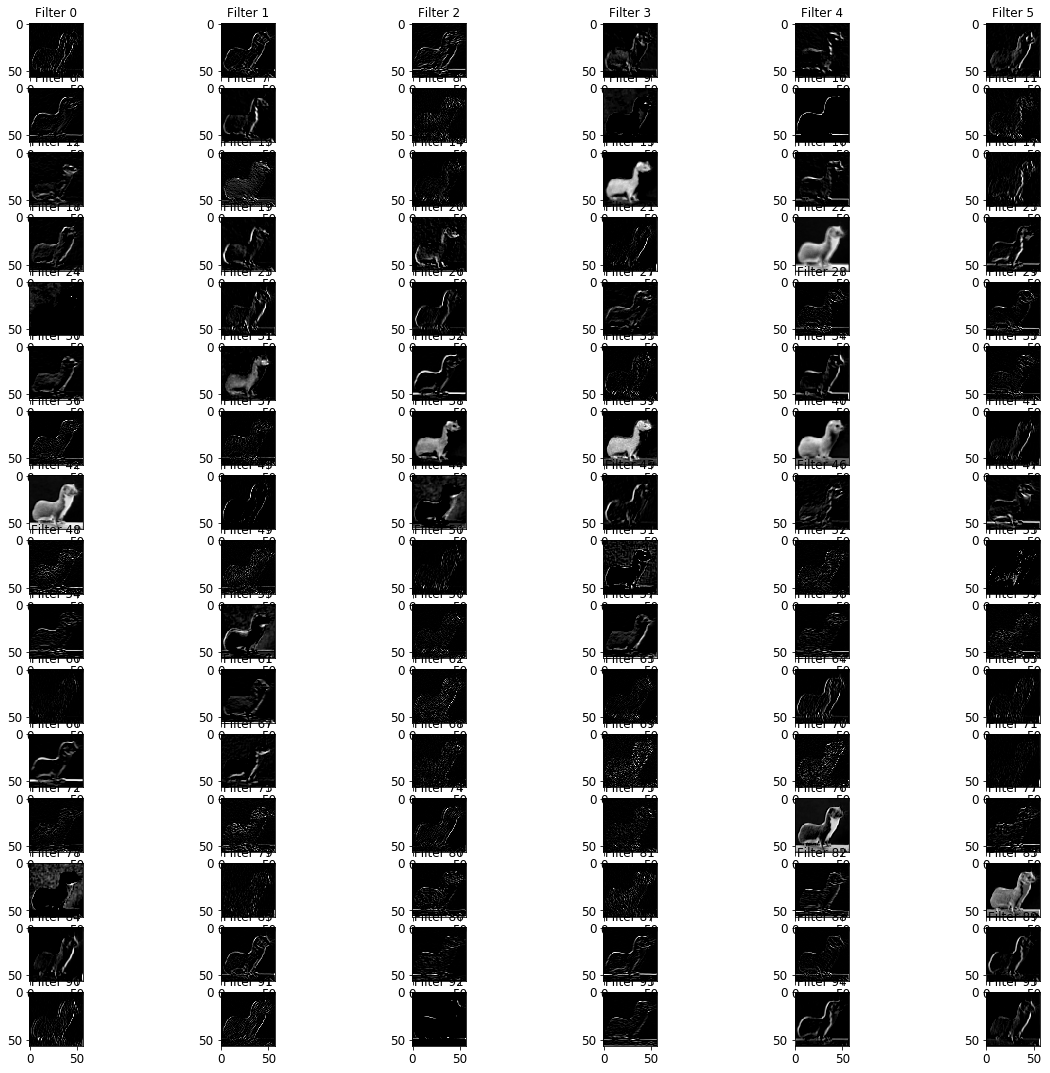

In [37]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1, 227,227,3],order='F')})
    plotNNFilter(units)

def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")
        
#Problem 4.2(
imageToUse = (imread("laska.png")[:,:,:3]).astype(np.float32)
#plt.imshow(imageToUse)
getActivations(conv1,imageToUse)

Here, we can see that the dimension [?,57,57,96], the ? is the tf's dynamic dimension, which stands for the minibatch size here. 

### Problem 4.3

The output of the final layer is stored in tf variable fc8, therefore it's the variable we want to extract.Here, we can see that the shape of fc8 is 1 by 1000, which correspond to the number of total probable classes. 

In [38]:
imageToUse = (imread("laska.png")[:,:,:3]).astype(np.float32)
fully_connected1 = sess.run(fc8,feed_dict={x:np.reshape(imageToUse,[ 1, 227,227,3],order='F')})
#print(fully_connected1)
print(fully_connected1.shape)

imageToUse2 = (imread("dog2.png")[:,:,:3]).astype(np.float32)
fully_connected2 = sess.run(fc8,feed_dict={x:np.reshape(imageToUse2,[ 1, 227,227,3],order='F')})
#print(fully_connected2)
print(fully_connected2.shape)
imageToUse3 = (imread("poodle.png")[:,:,:3]).astype(np.float32)
fully_connected3 = sess.run(fc8,feed_dict={x:np.reshape(imageToUse3,[ 1, 227,227,3],order='F')})
print(fully_connected3.shape)

(1, 1000)
(1, 1000)
(1, 1000)


### Problem 4.4
<img style="transform: rotate(90deg); width:500px" src="41.jpg" />

### Problem 4.5

In [45]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.INFO)
tf.reset_default_graph()
def cnn_model(features,labels, mode):
    
    input_layer = tf.reshape(features["x"], [-1, 28, 28, 1]) #[batch size, width, height channels]
    #batch size is -1 because it's dynamically computed based on the number of input values
    conv_layer1 = tf.layers.conv2d(
        inputs = input_layer,
        filters = 64,
        kernel_size = [5,5],
        padding="same",
        activation=tf.nn.relu
    )

    max_pool1 = tf.layers.max_pooling2d(inputs = conv_layer1, pool_size = [2,2], strides = 2)

    conv_layer2 = tf.layers.conv2d(
        inputs = input_layer,
        filters = 128,
        kernel_size = [5,5],
        padding="same",
        activation=tf.nn.relu
    )

    max_pool2 = tf.layers.max_pooling2d(inputs = conv_layer1, pool_size = [2,2], strides = 2)

    flatten1 = tf.reshape(max_pool2, [-1,7*7*256])
    fully_connected = tf.layers.dense(inputs=flatten1, units=1024, activation=tf.nn.relu)

    dropout = tf.layers.dropout(inputs = fully_connected, rate = 0.3, training= mode == tf.estimator.ModeKeys.TRAIN)

    logits = tf.layers.dense(inputs = dropout, units = 10)
    predictions = {
      # Generate predictions (for PREDICT and EVAL mode)
      "classes": tf.argmax(input=logits, axis=1),
      # Add `softmax_tensor` to the graph. It is used for PREDICT and by the
      # `logging_hook`.
      "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
        }

    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optimizer.minimize(loss=loss, global_step=tf.train.get_global_step())
    if mode == tf.estimator.ModeKeys.TRAIN:
        
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    eval_metric_ops = {
      "accuracy": tf.metrics.accuracy(
          labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)


   


In [46]:
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
 # Load training and eval data
train_data = mnist.train.images # Returns np.array
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)
eval_data = mnist.test.images # Returns np.array
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)
# Create the Estimator
mnist_classifier = tf.estimator.Estimator(
    model_fn=cnn_model, model_dir="/tmp/mnist_convnet_model")

# Set up logging for predictions
tensors_to_log = {"probabilities": "softmax_tensor"}
#logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

# Train the model
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": train_data},
    y=train_labels,
    batch_size=32,
    num_epochs=None,
    shuffle=True)
mnist_classifier.train(
    input_fn=train_input_fn,
    steps=1000)
    #hooks=[logging_hook])

# Evaluate the model and print results
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": eval_data},
    y=eval_labels,
    num_epochs=1,
    shuffle=False)
eval_results = mnist_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

Extracting MNIST-data\train-images-idx3-ubyte.gz
Extracting MNIST-data\train-labels-idx1-ubyte.gz
Extracting MNIST-data\t10k-images-idx3-ubyte.gz
Extracting MNIST-data\t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/mnist_convnet_model', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/mnist_convnet_model\model.ckpt-5003
INFO:tensorflow:Saving checkpoints for 5004 into /tmp/mnist_convnet_model\model.ckpt.
INFO:tensorflow:loss = 0.37758237, step = 5004
INFO:tensorflow:global_step/sec: 11.1747
INFO:tensorflow:loss = 0.36534873, step = 5104 (8.951 sec)
INFO:tensorflow:global_step/sec: 10.3319
INFO:tensorflow:loss = 0.5528382, step = 5204 (9.679 sec)

For my network, there are two convolutional layers, each followed by a max pooling layer. Two fully-connected layer and a dropout layer follows. Convolutional layers each had 64, 128 filters. The size of the convolution kernels are 5 by 5. I also included a dropput layer with dropout rate of 0.3 at the end to prevent overfitting. I choose minibatch size of 32. I choose learning rate as 0.01.

For the optimizer, I choose the ``tf.train.AdamOptimizer`` as it converges faster based on previous problems. 